# Exploration of Craigslist

# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

# Obtain web data, including handling JSON
import requests

# Natural Language Processing (NLP) - Sentiment Analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Natural Language Processing (NLP)
import nltk

# Library for Craigslist
import craigslist

In [2]:
# nltk.download()

# Craigslist APIs

In [3]:
# Craigslist
# API description - https://www.craigslist.org/about/reference
# API endpoint - http://reference.craigslist.org
base_url = "http://reference.craigslist.org/"

# Areas: The list of areas and subareas for which a Craigslist site is established
areas_request = "Areas"

# Categories: The list of categories associated with entries on Craigslist
categories_request = "Categories"


## Explore Craigslist Areas

In [4]:
base_url + areas_request

'http://reference.craigslist.org/Areas'

In [5]:
# Get the list of Craiglist areas and subareas
response = requests.get(base_url + areas_request)

In [6]:
# Confirm that the web response code is OK
assert response.status_code == 200, "Return code NOK: {response.status_code}"

In [7]:
# Put the JSON results into a dictionary
area_list = response.json()
# pprint(area_list)

In [8]:
# Create dataframe of areas
areas_df = pd.DataFrame( area_list )

# Exclude the dictionaries in SubAreas since they will form a separate dataframe
areas_df.drop(columns=['SubAreas'], inplace=True)
areas_df

,Abbreviation,AreaID,Country,Description,Hostname,Latitude,Longitude,Region,ShortDescription,Timezone
0,sfo,1,US,SF bay area,sfbay,37.500000,-122.250000,CA,SF bay area,America/Los_Angeles
1,sea,2,US,seattle-tacoma,seattle,47.606400,-122.331001,WA,seattle,America/Los_Angeles
2,nyc,3,US,new york city,newyork,40.714199,-74.006401,NY,new york,America/New_York
3,bos,4,US,boston,boston,42.358299,-71.060303,MA,boston,America/New_York
4,lax,7,US,los angeles,losangeles,34.052200,-118.242996,CA,los angeles,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...
702,hnf,709,US,hanford-corcoran,hanford,36.327400,-119.646004,CA,hanford,America/Los_Angeles
703,smx,710,US,"santa maria, CA",santamaria,34.963799,-120.433296,CA,santa maria,America/Los_Angeles
704,okv,711,US,"winchester, VA",winchester,39.178299,-78.166603,VA,winchester,America/New_York
705,vaw,712,US,southwest VA,swva,36.892803,-82.084351,VA,southwest VA,America/New_York


In [9]:
# Create a dataframe of subareas that are correlated to Area IDs
subareas_df = pd.DataFrame()
i=0
for a in area_list:
    d_text  = f"Area [{a['AreaID']}]: {a['Description']} => "

    # Check for subareas
    if 'SubAreas' in a.keys():
          
        # For this specific area, create a temp dataframe of subareas
        # based upon the dictionary specified in the SubAreas column
        temp_df = pd.Series(a['SubAreas']).apply(pd.Series)

        # Add the AreaID for this area to each of the subareas in the temp dataframe
        temp_df['AreaID'] = a['AreaID']

        # Append this temp dataframe to the dataframe of subareas
        subareas_df = subareas_df.append( temp_df, ignore_index=True)
        
        # Add a note to the debug text
        d_text += f"{len(temp_df)} Subareas processed"
        
    else:
        # There are no subareas for this specific area
        d_text += f"No Subareas"

    # print(d_text)

In [10]:
subareas_df

,Abbreviation,Description,ShortDescription,SubAreaID,AreaID
0,sfc,city of san francisco,san francisco,1,1
1,sby,south bay area,south bay,2,1
2,eby,east bay area,east bay,3,1
3,pen,peninsula,peninsula,4,1
4,nby,north bay / marin,north bay,5,1
...,...,...,...,...,...
98,psc,pasco co,pasco co,3,37
99,pnl,pinellas co,pinellas co,4,37
100,lee,lee county,lee county,1,125
101,chl,charlotte county,charlotte co,2,125


In [11]:
area_info_df = areas_df.merge(subareas_df, on='AreaID', how='left', suffixes=('_Area', '_SubArea') )

In [12]:
area_info_df = area_info_df[ [
        'AreaID', 'Abbreviation_Area', 'ShortDescription_Area', 'Description_Area',
        'Hostname', 'Region',  'Country', 'Latitude', 'Longitude', 'Timezone',
        'SubAreaID', 'Abbreviation_SubArea', 'ShortDescription_SubArea', 'Description_SubArea'
        ] ]
area_info_df

,AreaID,Abbreviation_Area,ShortDescription_Area,Description_Area,Hostname,Region,Country,Latitude,Longitude,Timezone,SubAreaID,Abbreviation_SubArea,ShortDescription_SubArea,Description_SubArea
0,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,1.0,sfc,san francisco,city of san francisco
1,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,2.0,sby,south bay,south bay area
2,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,3.0,eby,east bay,east bay area
3,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,4.0,pen,peninsula,peninsula
4,1,sfo,SF bay area,SF bay area,sfbay,CA,US,37.500000,-122.250000,America/Los_Angeles,5.0,nby,north bay,north bay / marin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,709,hnf,hanford,hanford-corcoran,hanford,CA,US,36.327400,-119.646004,America/Los_Angeles,NaN,NaN,NaN,NaN
786,710,smx,santa maria,"santa maria, CA",santamaria,CA,US,34.963799,-120.433296,America/Los_Angeles,NaN,NaN,NaN,NaN
787,711,okv,winchester,"winchester, VA",winchester,VA,US,39.178299,-78.166603,America/New_York,NaN,NaN,NaN,NaN
788,712,vaw,southwest VA,southwest VA,swva,VA,US,36.892803,-82.084351,America/New_York,NaN,NaN,NaN,NaN


## Explore Craigslist Categories

In [13]:
base_url + categories_request

'http://reference.craigslist.org/Categories'

In [14]:
# Get the list of Craiglist areas and subareas
response = requests.get(base_url + categories_request)

In [15]:
# Confirm that the web response code is OK
assert response.status_code == 200, "Return code NOK: {response.status_code}"

In [16]:
# Put the JSON results into a dictionary
cat_list = response.json()
# pprint(cat_list)

In [17]:
# Create dataframe of Categories
cat_df = pd.DataFrame( cat_list )
# cat_df

In [18]:
# Create a dictionary of Category Types (based upon reference page info)
cat_type_dict = {
    'B': 'Services',
    'C': 'Community',
    'E': 'Events',
    'G': 'Gigs',
    'H': 'Housing',
    'J': 'Jobs',
    'P': 'Personals',
    'R': 'Resumes',
    'S': 'For Sale / Wanted',
    'L': 'TBD'
}

In [19]:
cat_df['Type_Definition'] = cat_df['Type'].apply(lambda x: cat_type_dict[x] if x in cat_type_dict.keys() else None)
cat_df

,Abbreviation,CategoryID,Description,Type,Type_Definition
0,apa,1,apts/housing for rent,H,Housing
1,hou,2,wanted: apts,H,Housing
2,com,3,general community,C,Community
3,biz,4,small biz ads,B,Services
4,for,5,general for sale - by owner,S,For Sale / Wanted
...,...,...,...,...,...
175,tro,205,trailers - by owner,S,For Sale / Wanted
176,trb,206,trailers - by dealer,S,For Sale / Wanted
177,cms,207,cell phone / mobile services,B,Services
178,avo,208,aviation - by owner,S,For Sale / Wanted


In [20]:
# No idea what category type = 'L' is for, so made it 'TBD'
cat_df[ cat_df['Type']=='L' ]

,Abbreviation,CategoryID,Description,Type,Type_Definition
48,cal,66,event calendar,L,TBD


# Searches on Craigslist

In [21]:
# Craigslist search: http://YOURCITY.craigslist.org/search/sss?format=rss&query=SearchString
# This returns a rss/xml file

In [22]:
# Instead, use the craigslist library to perform the search, for example:
# craigslist.search(
#     area,
#     category,
#     type_="jsonsearch",
#     get_detailed_posts=False,
#     cache=True,
#     cachedir=os.path.expanduser('~'),
#     executor=None,
#     executor_class='concurrent.futures.ThreadPoolExecutor',
#     max_workers=None,
#     get=requests_get,
#     **kwargs):

In [25]:
# Search for apartments in Chicago within 1 mile(?) of postal code 60661
search_generator = craigslist.search(area='chicago', category='apa', postal=60661, search_distance=1,
                                      get_detailed_posts=True, limit=1 )

In [26]:
i=0
p_list = []
for p in search_generator:
    p_list.append( dict( p._asdict() ) )
    i += 1
    if i>100: break

In [27]:
post_df = pd.DataFrame( p_list )
post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date
0,7014422069,6713247700,https://chicago.craigslist.org/chc/apa/d/chica...,$1600 / 700ft2 - Modern Chicago Condo With Pa...,"Modern Chicago Condo With Parking, WD, SS, Wes...",West Loop,NaN,700.0,1600,"<section id=""postingbody"">\n <br>\n<br>...",- Parking included\n- Hardwood floors\n- Upgra...,None,2019-12-01
1,7010529780,6294316020,https://chicago.craigslist.org/chc/apa/d/chica...,$2300 / 1br - Gorgeous 1 bed in the Loop with...,Gorgeous 1 bed in the Loop with break-taking a...,"Loop, River North, Downtown",1.0,NaN,2300,"<section id=""postingbody"">\n <p><b></b>...",Visit http://www.zchicago.com/for-rent/ for mo...,Lake near Michigan,2019-11-15
2,7008203426,6807184801,https://chicago.craigslist.org/chc/apa/d/chica...,"$1695 / 1br - Spacious 1BR, Large Closet - Gr...","Spacious 1BR, Large Closet - Great Views!",WEST LOOP - DOWNTOWN,1.0,NaN,1695,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-27
3,7012870913,6775778935,https://chicago.craigslist.org/chc/apa/d/chica...,$2555 / 2br - Great Deal! Spacious West Loop ...,"Great Deal! Spacious West Loop 2BR, Hardwood, ...",WEST LOOP - DOWNTOWN,2.0,NaN,2555,"<section id=""postingbody"">\n <br>\n<br>...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-11-03
4,7010901816,None,https://chicago.craigslist.org/chc/apa/d/chica...,$5900 / 3br - 2650ft2 - Lux 3bd/3.5bth Fulton...,Lux 3bd/3.5bth Fulton Market Loft,"West Loop, Chicago",3.0,2650.0,5900,"<section id=""postingbody"">\n <br>\n<br>...",Two assigned parking spaces are included. Just...,Racine near Kinzie,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6998248153,6807190367,https://chicago.craigslist.org/chc/apa/d/chica...,"$1495 Spacious Studio, Great Views!","Spacious Studio, Great Views!",WEST LOOP - DOWNTOWN,NaN,NaN,1495,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-13
97,7006715545,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1990 / 1br - Fantastic Studio in West Loop! ...,Fantastic Studio in West Loop! Great Price for...,Chicago - West Loop,1.0,NaN,1990,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 72842009Rent: 1990 / MonthB...,West Van Buren,None
98,7006459993,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2900 / 2br - 1200ft2 - 2bed/2bath Condo for ...,2bed/2bath Condo for rent in The Loop! Laundry...,Chicago,2.0,1200.0,2900,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 185775336Rent: 2900 / Month...,Washington,None
99,7016173158,6994035302,https://chicago.craigslist.org/chc/apa/d/chica...,$2200 / 1br - 700ft2 - Clean 1 Bedroom Condo ...,Clean 1 Bedroom Condo for Rent,West Loop,1.0,700.0,2200,"<section id=""postingbody"">\n <br>\nAvai...","Available December 20th, 2019 for Winter seaso...",Van Buren St near Desplaines St,2019-12-20


In [28]:
p_list

[{'id': 7014422069,
  'repost_id': '6713247700',
  'url': 'https://chicago.craigslist.org/chc/apa/d/chicago-modern-chicago-condo-with/7014422069.html',
  'full_title': '$1600 / 700ft2 -  Modern Chicago Condo With Parking, WD, SS, West Loop',
  'short_title': 'Modern Chicago Condo With Parking, WD, SS, West Loop',
  'hood': 'West Loop',
  'num_bedrooms': None,
  'sqftage': 700,
  'price': '1600',
  'body_html': '<section id="postingbody">\n        <br>\n<br>\n- Parking included<br>\n- Hardwood floors<br>\n- Upgraded kitchen with new granite countertops and stainless steel appliances<br>\n- Hansgrohe/Grohe faucets<br>\n- Jacuzzi tub<br>\n- Full-size washer and dryer<br>\n- Recently remodeled fireplace<br>\n- Large rooftop deck with amazing city views<br>\n<br>\nThis perfect location is steps away from the Blue Line, expressways, and buses. Walking distance to the Randolph Street restaurants, Greek Town, Ukrainian Village, River North, West Loop and Loop. Short EL ride to Wicker Park/Buck

In [29]:
# post_df.dtypes

In [30]:
post_df['body_text'].apply(len).describe()

count     101.000000
mean     1113.198020
std       677.649659
min         0.000000
25%       766.000000
50%      1057.000000
75%      1276.000000
max      2808.000000
Name: body_text, dtype: float64

In [31]:
# Get all of the words in the body_text
post_df['word_list'] = post_df['body_text'].apply(str.lower).apply(str.split).apply(sorted)
post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date,word_list
0,7014422069,6713247700,https://chicago.craigslist.org/chc/apa/d/chica...,$1600 / 700ft2 - Modern Chicago Condo With Pa...,"Modern Chicago Condo With Parking, WD, SS, Wes...",West Loop,NaN,700.0,1600,"<section id=""postingbody"">\n <br>\n<br>...",- Parking included\n- Hardwood floors\n- Upgra...,None,2019-12-01,"[-, -, -, -, -, -, -, -, amazing, and, and, an..."
1,7010529780,6294316020,https://chicago.craigslist.org/chc/apa/d/chica...,$2300 / 1br - Gorgeous 1 bed in the Loop with...,Gorgeous 1 bed in the Loop with break-taking a...,"Loop, River North, Downtown",1.0,NaN,2300,"<section id=""postingbody"">\n <p><b></b>...",Visit http://www.zchicago.com/for-rent/ for mo...,Lake near Michigan,2019-11-15,"[$450pets, &, (see, -, /, /, /, 1, 1, 1, 1, 1,..."
2,7008203426,6807184801,https://chicago.craigslist.org/chc/apa/d/chica...,"$1695 / 1br - Spacious 1BR, Large Closet - Gr...","Spacious 1BR, Large Closet - Great Views!",WEST LOOP - DOWNTOWN,1.0,NaN,1695,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-27,"[""loop"",, &, &, (indoor, *nearby:, *rental, /,..."
3,7012870913,6775778935,https://chicago.craigslist.org/chc/apa/d/chica...,$2555 / 2br - Great Deal! Spacious West Loop ...,"Great Deal! Spacious West Loop 2BR, Hardwood, ...",WEST LOOP - DOWNTOWN,2.0,NaN,2555,"<section id=""postingbody"">\n <br>\n<br>...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-11-03,"[""loop"",, &, &, (indoor, *nearby:, *rental, /,..."
4,7010901816,None,https://chicago.craigslist.org/chc/apa/d/chica...,$5900 / 3br - 2650ft2 - Lux 3bd/3.5bth Fulton...,Lux 3bd/3.5bth Fulton Market Loft,"West Loop, Chicago",3.0,2650.0,5900,"<section id=""postingbody"">\n <br>\n<br>...",Two assigned parking spaces are included. Just...,Racine near Kinzie,2019-11-01,"[all, an, and, are, assigned, away, easy, fult..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6998248153,6807190367,https://chicago.craigslist.org/chc/apa/d/chica...,"$1495 Spacious Studio, Great Views!","Spacious Studio, Great Views!",WEST LOOP - DOWNTOWN,NaN,NaN,1495,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-13,"[""loop"",, &, &, (indoor, *nearby:, *rental, /,..."
97,7006715545,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1990 / 1br - Fantastic Studio in West Loop! ...,Fantastic Studio in West Loop! Great Price for...,Chicago - West Loop,1.0,NaN,1990,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 72842009Rent: 1990 / MonthB...,West Van Buren,None,"[#481.011892), (breed, -broker, /, 10-minute, ..."
98,7006459993,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2900 / 2br - 1200ft2 - 2bed/2bath Condo for ...,2bed/2bath Condo for rent in The Loop! Laundry...,Chicago,2.0,1200.0,2900,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 185775336Rent: 2900 / Month...,Washington,None,"[$100/month!, &, &, &, &, &, &, (garage), -bro..."
99,7016173158,6994035302,https://chicago.craigslist.org/chc/apa/d/chica...,$2200 / 1br - 700ft2 - Clean 1 Bedroom Condo ...,Clean 1 Bedroom Condo for Rent,West Loop,1.0,700.0,2200,"<section id=""postingbody"">\n <br>\nAvai...","Available December 20th, 2019 for Winter seaso...",Van Buren St near Desplaines St,2019-12-20,"[2019, 20th,, 24/7, amenities, and, and, and, ..."


In [32]:
# Function to keep only alphabetic strings as words
def keep_alpha(a_list):
    w_list = []
    for w in a_list:
        if w.isalpha():
            w_list.append(w)
    
    return w_list

In [33]:
# Function to count the number of words in a list and return as a dictionary
def count_words(a_list):
    wc_dict = {}
    for w in a_list:
        if w in wc_dict.keys():
            wc_dict[w] += 1
        else:
            wc_dict[w] = 1
    
    return wc_dict

In [34]:
post_df['word_list']

0      [-, -, -, -, -, -, -, -, amazing, and, and, an...
1      [$450pets, &, (see, -, /, /, /, 1, 1, 1, 1, 1,...
2      ["loop",, &, &, (indoor, *nearby:, *rental, /,...
3      ["loop",, &, &, (indoor, *nearby:, *rental, /,...
4      [all, an, and, are, assigned, away, easy, fult...
                             ...                        
96     ["loop",, &, &, (indoor, *nearby:, *rental, /,...
97     [#481.011892), (breed, -broker, /, 10-minute, ...
98     [$100/month!, &, &, &, &, &, &, (garage), -bro...
99     [2019, 20th,, 24/7, amenities, and, and, and, ...
100    ["loop",, &, &, (indoor, *nearby:, *rental, /,...
Name: word_list, Length: 101, dtype: object

In [35]:
post_df['word_list'] = post_df['word_list'].apply(keep_alpha)
post_df['word_list']

0      [amazing, and, and, and, and, appliances, away...
1      [a, a, accesssecurity, accessshared, advantage...
2      [a, a, actual, all, and, and, any, apartment, ...
3      [a, a, actual, all, and, and, any, apartment, ...
4      [all, an, and, are, assigned, away, easy, fult...
                             ...                        
96     [a, a, actual, all, and, and, any, apartment, ...
97     [a, a, a, a, a, a, a, a, additional, additiona...
98     [a, abundance, airdishwasherdoor, all, amenity...
99     [amenities, and, and, and, and, and, and, and,...
100    [a, a, actual, all, and, and, any, apartment, ...
Name: word_list, Length: 101, dtype: object

In [36]:
# Create a DataFrame for each word and number of occurrences per post
pw_df = pd.DataFrame( list( post_df['word_list'].apply(count_words) ) )
pw_df

,amazing,and,appliances,away,blue,city,countertops,deck,distance,dryer,...,hbo,parties,professionals,renter,safe,season,smoking,store,students,winter
0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
# Statistics for each word in cases where the word is present in a sample post
pw_info_df = pw_df[ pw_df.notna() ].describe().transpose().sort_index()
pw_info_df

,count,mean,std,min,25%,50%,75%,max
a,67.0,2.880597,2.063554,1.0,2.0,2.0,3.0,10.0
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0
about,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
zager,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [38]:
# Rename columns to later be able to differentiate count of samples that have a word
# vs. count of words across all samples
# pw_info_df.rename( columns = {
#         'count': 'count_samples_with_word',
#         'mean': 'mean', 'std':'std', 'max':'max', 'min':'min',
#         '50%': 'median', '25%':'25%', '75%':'75%'
#     }, inplace=True )

pw_info_df.rename( columns = {
        'count': 'count_samples_with_word',
        '50%': 'median'
    }, inplace=True )

# 
pw_info_df['count_total_samples'] = len(pw_df)
pw_info_df['%_of_samples'] = pw_info_df['count_samples_with_word'] / pw_info_df['count_total_samples']
pw_info_df

,count_samples_with_word,mean,std,min,25%,median,75%,max,count_total_samples,%_of_samples
a,67.0,2.880597,2.063554,1.0,2.0,2.0,3.0,10.0,101,0.663366
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0,101,0.049505
about,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.019802
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
...,...,...,...,...,...,...,...,...,...,...
zager,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.089109
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901


In [39]:
# Sum of word counts across all samples
pw_info_df['count_word'] = pw_df[ pw_df.notna() ].apply(np.sum)
pw_info_df

,count_samples_with_word,mean,std,min,25%,median,75%,max,count_total_samples,%_of_samples,count_word
a,67.0,2.880597,2.063554,1.0,2.0,2.0,3.0,10.0,101,0.663366,193.0
aberdeen,5.0,1.200000,0.447214,1.0,1.0,1.0,1.0,2.0,101,0.049505,6.0
about,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.019802,2.0
above,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
abundance,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
...,...,...,...,...,...,...,...,...,...,...,...
zager,9.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,101,0.089109,9.0
zelle,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
zip,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0
zureikat,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,101,0.009901,1.0


In [40]:
# Reorder the columns
pw_info_df = pw_info_df[['count_word', 'count_samples_with_word', 'count_total_samples', '%_of_samples', 
                         'max', 'min', 'mean', 'std', '75%', 'median', '25%' ]]
pw_info_df

,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
a,193.0,67.0,101,0.663366,10.0,1.0,2.880597,2.063554,3.0,2.0,2.0
aberdeen,6.0,5.0,101,0.049505,2.0,1.0,1.200000,0.447214,1.0,1.0,1.0
about,2.0,2.0,101,0.019802,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
above,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
abundance,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
zager,9.0,9.0,101,0.089109,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
zelle,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
zip,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
zureikat,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


In [41]:
# pw_info_df[ pw_info_df['median'] > 2 ].sort_values(by=['median', 'count_word'], ascending=[False, False])
pw_info_df.sort_values(by=['count_word'], ascending=[False])

,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
the,523.0,81.0,101,0.801980,16.0,1.0,6.456790,3.937161,8.0,8.0,4.0
and,437.0,89.0,101,0.881188,17.0,1.0,4.910112,4.682269,6.0,3.0,2.0
to,248.0,86.0,101,0.851485,22.0,1.0,2.883721,3.592209,3.0,2.0,1.0
with,225.0,77.0,101,0.762376,9.0,1.0,2.922078,1.965266,3.0,2.0,2.0
in,203.0,84.0,101,0.831683,8.0,1.0,2.416667,1.441287,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
into,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
italy,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
ivy,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
iwaniec,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


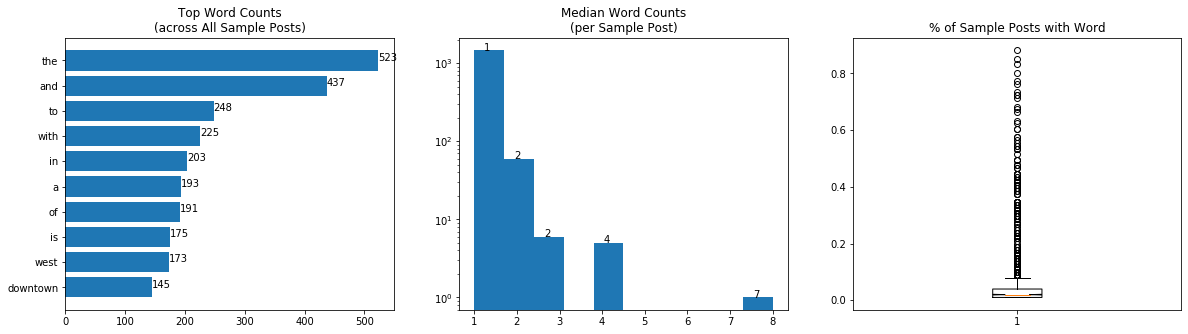

In [42]:
# Plots - Matplotlib
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Column (bar) chart
# Add a title
ax1.set_title("Top Word Counts\n(across All Sample Posts)")

# Plot only a subset of the data
n_bar_samples = 10
bar_plot_df = pw_info_df.sort_values(by=['count_word'], ascending=[False])['count_word'].iloc[0:n_bar_samples]

# Reverse the list so that the descreasing values are plotted from top to bottom
values_bar = list(reversed(bar_plot_df.values))
labels_bar = list(reversed(bar_plot_df.index))

# Create the horizontal bar plot
ax1.barh(labels_bar, values_bar )

# Add a label for each bar providing word count
for i in range(n_bar_samples):
    ax1.text(values_bar[i], labels_bar[i], f"{values_bar[i]:.0f}" )

# Histogram
# Add a title
ax2.set_title("Median Word Counts\n(per Sample Post)")

# Plot the histogram
h_retval = ax2.hist(pw_info_df['median'], log=True)

# Add labels to the histogram bars
n_bins = len(h_retval[0])
n_bin_width = h_retval[1][1] - h_retval[1][0]
for i in range(n_bins):
    if h_retval[0][i] > 0:
        ax2.text(h_retval[1][i]+n_bin_width/3, h_retval[0][i], f"{h_retval[1][i]:.0f}" )

# Boxplot
# Add a title
ax3.set_title("% of Sample Posts with Word")

# Plot the boxplot
b_retval = ax3.boxplot(pw_info_df['%_of_samples'], notch=True)

In [45]:
pw_info_df = pw_info_df.reset_index().rename( columns={'index':'word'})
pw_info_df

,word,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
0,a,193.0,67.0,101,0.663366,10.0,1.0,2.880597,2.063554,3.0,2.0,2.0
1,aberdeen,6.0,5.0,101,0.049505,2.0,1.0,1.200000,0.447214,1.0,1.0,1.0
2,about,2.0,2.0,101,0.019802,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
3,above,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
4,abundance,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,zager,9.0,9.0,101,0.089109,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
1536,zelle,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
1537,zip,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
1538,zureikat,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


In [46]:
pw_info_df

,word,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
0,a,193.0,67.0,101,0.663366,10.0,1.0,2.880597,2.063554,3.0,2.0,2.0
1,aberdeen,6.0,5.0,101,0.049505,2.0,1.0,1.200000,0.447214,1.0,1.0,1.0
2,about,2.0,2.0,101,0.019802,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
3,above,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
4,abundance,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1535,zager,9.0,9.0,101,0.089109,1.0,1.0,1.000000,0.000000,1.0,1.0,1.0
1536,zelle,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
1537,zip,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0
1538,zureikat,1.0,1.0,101,0.009901,1.0,1.0,1.000000,NaN,1.0,1.0,1.0


In [47]:
n_s_samples = 20
top_df = pw_info_df.sort_values(by=['count_word'], ascending=[False]).iloc[0:n_s_samples].reset_index(drop=True)
top_df

,word,count_word,count_samples_with_word,count_total_samples,%_of_samples,max,min,mean,std,75%,median,25%
0,the,523.0,81.0,101,0.801980,16.0,1.0,6.456790,3.937161,8.0,8.0,4.0
1,and,437.0,89.0,101,0.881188,17.0,1.0,4.910112,4.682269,6.0,3.0,2.0
2,to,248.0,86.0,101,0.851485,22.0,1.0,2.883721,3.592209,3.0,2.0,1.0
3,with,225.0,77.0,101,0.762376,9.0,1.0,2.922078,1.965266,3.0,2.0,2.0
4,in,203.0,84.0,101,0.831683,8.0,1.0,2.416667,1.441287,3.0,2.0,2.0
5,a,193.0,67.0,101,0.663366,10.0,1.0,2.880597,2.063554,3.0,2.0,2.0
6,of,191.0,78.0,101,0.772277,10.0,1.0,2.448718,1.799332,2.0,2.0,2.0
7,is,175.0,68.0,101,0.673267,14.0,1.0,2.573529,3.125801,2.0,1.0,1.0
8,west,173.0,58.0,101,0.574257,4.0,1.0,2.982759,1.206581,4.0,4.0,2.0
9,downtown,145.0,54.0,101,0.534653,4.0,1.0,2.685185,1.489891,4.0,4.0,1.0


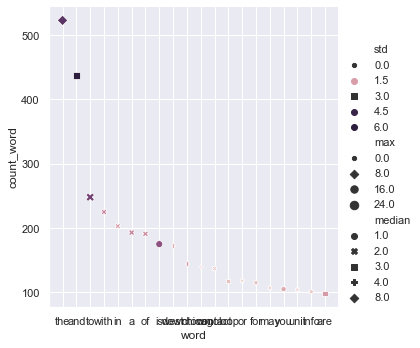

In [48]:
# Plots - Seaborn

# Plot only a subset of the data
# n_s_samples = 10
# s_plot_df = pw_info_df.sort_values(by=['count_word'], ascending=[False])['count_word'].iloc[0:n_s_samples]

# Generate seaborn plot
sns.set()
sns.relplot(x='word', y='count_word',
            style='median',
            hue='std', size='max', data=top_df)

plt.show()



In [49]:
# nltk.download('movie_reviews')

In [50]:
# nltk.download('punkt')

In [124]:
# Natural Language Processing
def get_sentiment(a_text, a_incl_nb=False):
    sent_def_analysis = TextBlob(a_text)
    
    # Default analysis

    # The polarity score is a float within the range [-1.0, 1.0]
    # where negative value indicates negative text and positive
    # value indicates that the given text is positive.
    def_polarity = sent_def_analysis.sentiment.polarity

    # The subjectivity is a float within the range [0.0, 1.0] where
    # 0.0 is very objective and 1.0 is very subjective.
    def_subjectivity = sent_def_analysis.sentiment.subjectivity
    
    r_dict = {
        'sa_def_polarity': def_polarity,
        'sa_def_subjectivity': def_subjectivity
    }

    # If specified, include Naive Bayes analysis as well
    if a_incl_nb:
        sent_nb_analysis = TextBlob(a_text, analyzer = NaiveBayesAnalyzer())
        nb_classification = sent_nb_analysis.sentiment.classification
        nb_positive = sent_nb_analysis.sentiment.p_pos
        nb_negative = sent_nb_analysis.sentiment.p_neg
        
        # Add the NB results to the results dictionary
        r_dict['sa_nb_classification'] = nb_classification
        r_dict['sa_nb_positive'] = nb_positive
        r_dict['sa_nb_negative'] = nb_negative

    # Build a results summary
    r_summary  = f"Sentiment Analysis:\n"
    r_summary += f"Polarity: {def_polarity:0.4f}, Subjectivity: {def_subjectivity:0.4f}\n"

    if a_incl_nb:
        # Add a summary of the NB results to the results summary
        r_summary += f"Classification: {nb_classification}, Positive: {nb_positive:0.4f}, Negative: {nb_negative:0.4f}\n"

    # Add the analyzed text to the results summary
    r_summary += f"Text:\n{a_text}"

    # Add the results summary to the results dictionary
    r_dict['sa_summary'] = r_summary
    
    return r_dict
    

In [126]:
# Test phrase
results = get_sentiment("I feel the product is so good", True )
results

{'sa_def_polarity': 0.7,
 'sa_def_subjectivity': 0.6000000000000001,
 'sa_nb_classification': 'neg',
 'sa_nb_positive': 0.4662003135404217,
 'sa_nb_negative': 0.5337996864595786,
 'sa_summary': 'Sentiment Analysis:\nPolarity: 0.7000, Subjectivity: 0.6000\nClassification: neg, Positive: 0.4662, Negative: 0.5338\nText:\nI feel the product is so good'}

In [127]:
# Perform SA on a sample post
results = get_sentiment(post_df['body_text'][0], True )
results

{'sa_def_polarity': 0.2400649350649351,
 'sa_def_subjectivity': 0.3833116883116883,
 'sa_nb_classification': 'pos',
 'sa_nb_positive': 0.999566967535462,
 'sa_nb_negative': 0.0004330324645444194,
 'sa_summary': 'Sentiment Analysis:\nPolarity: 0.2401, Subjectivity: 0.3833\nClassification: pos, Positive: 0.9996, Negative: 0.0004\nText:\n- Parking included\n- Hardwood floors\n- Upgraded kitchen with new granite countertops and stainless steel appliances\n- Hansgrohe/Grohe faucets\n- Jacuzzi tub\n- Full-size washer and dryer\n- Recently remodeled fireplace\n- Large rooftop deck with amazing city views\n\nThis perfect location is steps away from the Blue Line, expressways, and buses. Walking distance to the Randolph Street restaurants, Greek Town, Ukrainian Village, River North, West Loop and Loop. Short EL ride to Wicker Park/Bucktown.\n\nThanks for looking!'}

In [134]:
post_df[0:2]

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date,word_list
0,7014422069,6713247700,https://chicago.craigslist.org/chc/apa/d/chica...,$1600 / 700ft2 - Modern Chicago Condo With Pa...,"Modern Chicago Condo With Parking, WD, SS, Wes...",West Loop,NaN,700.0,1600,"<section id=""postingbody"">\n <br>\n<br>...",- Parking included\n- Hardwood floors\n- Upgra...,None,2019-12-01,"[amazing, and, and, and, and, appliances, away..."
1,7010529780,6294316020,https://chicago.craigslist.org/chc/apa/d/chica...,$2300 / 1br - Gorgeous 1 bed in the Loop with...,Gorgeous 1 bed in the Loop with break-taking a...,"Loop, River North, Downtown",1.0,NaN,2300,"<section id=""postingbody"">\n <p><b></b>...",Visit http://www.zchicago.com/for-rent/ for mo...,Lake near Michigan,2019-11-15,"[a, a, accesssecurity, accessshared, advantage..."


In [135]:
# Use get_sentiment to gather SA results for each of the posts
# Use 'True' arg to get both default and Naive Bayes analysis
# Drop the 'sa_summary' column - not needed in the resulting dataframe
sa_df = pd.DataFrame( list(post_df['body_text'].apply( get_sentiment, args=(True,) ) ) ).drop( columns=['sa_summary'])
sa_df

,sa_def_polarity,sa_def_subjectivity,sa_nb_classification,sa_nb_positive,sa_nb_negative
0,0.240065,0.383312,pos,0.999567,4.330325e-04
1,0.463889,0.619444,pos,1.000000,8.567881e-08
2,0.217634,0.362277,pos,1.000000,2.168531e-07
3,0.217634,0.362277,pos,1.000000,2.168531e-07
4,0.200000,0.411111,pos,0.998115,1.885375e-03
...,...,...,...,...,...
96,0.217634,0.362277,pos,1.000000,2.168531e-07
97,0.152453,0.385603,pos,1.000000,4.540196e-14
98,0.403571,0.675000,pos,1.000000,1.128286e-10
99,0.224694,0.491718,pos,1.000000,2.000891e-11


In [136]:
# Add the sentiment analysis columns to the main post dataframe
sa_post_df = pd.concat( [post_df, sa_df], axis=1)

In [137]:
sa_post_df

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date,word_list,sa_def_polarity,sa_def_subjectivity,sa_nb_classification,sa_nb_positive,sa_nb_negative
0,7014422069,6713247700,https://chicago.craigslist.org/chc/apa/d/chica...,$1600 / 700ft2 - Modern Chicago Condo With Pa...,"Modern Chicago Condo With Parking, WD, SS, Wes...",West Loop,NaN,700.0,1600,"<section id=""postingbody"">\n <br>\n<br>...",- Parking included\n- Hardwood floors\n- Upgra...,None,2019-12-01,"[amazing, and, and, and, and, appliances, away...",0.240065,0.383312,pos,0.999567,4.330325e-04
1,7010529780,6294316020,https://chicago.craigslist.org/chc/apa/d/chica...,$2300 / 1br - Gorgeous 1 bed in the Loop with...,Gorgeous 1 bed in the Loop with break-taking a...,"Loop, River North, Downtown",1.0,NaN,2300,"<section id=""postingbody"">\n <p><b></b>...",Visit http://www.zchicago.com/for-rent/ for mo...,Lake near Michigan,2019-11-15,"[a, a, accesssecurity, accessshared, advantage...",0.463889,0.619444,pos,1.000000,8.567881e-08
2,7008203426,6807184801,https://chicago.craigslist.org/chc/apa/d/chica...,"$1695 / 1br - Spacious 1BR, Large Closet - Gr...","Spacious 1BR, Large Closet - Great Views!",WEST LOOP - DOWNTOWN,1.0,NaN,1695,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-27,"[a, a, actual, all, and, and, any, apartment, ...",0.217634,0.362277,pos,1.000000,2.168531e-07
3,7012870913,6775778935,https://chicago.craigslist.org/chc/apa/d/chica...,$2555 / 2br - Great Deal! Spacious West Loop ...,"Great Deal! Spacious West Loop 2BR, Hardwood, ...",WEST LOOP - DOWNTOWN,2.0,NaN,2555,"<section id=""postingbody"">\n <br>\n<br>...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-11-03,"[a, a, actual, all, and, and, any, apartment, ...",0.217634,0.362277,pos,1.000000,2.168531e-07
4,7010901816,None,https://chicago.craigslist.org/chc/apa/d/chica...,$5900 / 3br - 2650ft2 - Lux 3bd/3.5bth Fulton...,Lux 3bd/3.5bth Fulton Market Loft,"West Loop, Chicago",3.0,2650.0,5900,"<section id=""postingbody"">\n <br>\n<br>...",Two assigned parking spaces are included. Just...,Racine near Kinzie,2019-11-01,"[all, an, and, are, assigned, away, easy, fult...",0.200000,0.411111,pos,0.998115,1.885375e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,6998248153,6807190367,https://chicago.craigslist.org/chc/apa/d/chica...,"$1495 Spacious Studio, Great Views!","Spacious Studio, Great Views!",WEST LOOP - DOWNTOWN,NaN,NaN,1495,"<section id=""postingbody"">\n <br>\nLuxu...",Luxury West Loop apartment in the West Loop!\n...,W Madison near N Clinton,2019-10-13,"[a, a, actual, all, and, and, any, apartment, ...",0.217634,0.362277,pos,1.000000,2.168531e-07
97,7006715545,None,https://chicago.craigslist.org/chc/apa/d/chica...,$1990 / 1br - Fantastic Studio in West Loop! ...,Fantastic Studio in West Loop! Great Price for...,Chicago - West Loop,1.0,NaN,1990,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 72842009Rent: 1990 / MonthB...,West Van Buren,None,"[a, a, a, a, a, a, a, a, additional, additiona...",0.152453,0.385603,pos,1.000000,4.540196e-14
98,7006459993,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2900 / 2br - 1200ft2 - 2bed/2bath Condo for ...,2bed/2bath Condo for rent in The Loop! Laundry...,Chicago,2.0,1200.0,2900,"<section id=""postingbody"">\n <h4>PROPER...",PROPERTY INFO\nID: 185775336Rent: 2900 / Month...,Washington,None,"[a, abundance, airdishwasherdoor, all, amenity...",0.403571,0.675000,pos,1.000000,1.128286e-10
99,7016173158,6994035302,https://chicago.craigslist.org/chc/apa/d/chica...,$2200 / 1br - 700ft2 - Clean 1 Bedroom Condo ...,Clean 1 Bedroom Condo for Rent,West Loop,1.0,700.0,2200,"<section id=""postingbody"">\n <br>\nAvai...","Available December 20th, 2019 for Winter seaso...",Van Buren St near Desplaines St,2019-12-20,"[amenities, and, and, and, and, 

In [143]:
for p in sa_post_df['body_text'][ sa_post_df['sa_nb_classification'] == 'neg' ]:
    print(f"POST:\n{p}\n")

POST:
Available Now!

Green Ivy Property Management

POST:
-Indoor parking
-Cable and High Speed Internet 
-In unit Laundry
-Most Utilities
INCLUDED!!!

Blue Moon Lofts 215 N Aberdeen Street

$2,300/mo

Electric and Gas about $50/each/month

Take over lease ASAP! Lease goes until Aug 30, 2020 with option to renew.
Owner is great and very responsive, zelle rent payments, brand new fridge!

Email/text with questions for fast response.

Right by google HQ, randolph, fulton market, Mcdonalds HQ, and easy transportation!!



In [145]:
sa_post_df[ sa_post_df['sa_nb_classification'] == 'neg' ]

,id,repost_id,url,full_title,short_title,hood,num_bedrooms,sqftage,price,body_html,body_text,address,available_date,word_list,sa_def_polarity,sa_def_subjectivity,sa_nb_classification,sa_nb_positive,sa_nb_negative
33,7010799953,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2095 / 1br - Great 1 bed / 1 bath River Nort...,Great 1 bed / 1 bath River North Condo - Avail...,River North,1.0,NaN,2095,"<section id=""postingbody"">\n <br>\n<br>...",Available Now!\n\nGreen Ivy Property Management,421 W Huron St Apt 508,2019-10-31,"[available, green, ivy, management, property]",0.150000,0.350000,neg,0.441275,0.558725
93,7003945713,None,https://chicago.craigslist.org/chc/apa/d/chica...,$2300 / 1br - 900ft2 - West Loop w/ Indoor Pa...,West Loop w/ Indoor Parking/laundry/Internet/C...,West Loop,1.0,900.0,2300,"<section id=""postingbody"">\n <br>\n-Ind...",-Indoor parking\n-Cable and High Speed Interne...,215 N Aberdeen Street,2019-10-21,"[aberdeen, about, and, and, and, and, aug, blu...",0.385535,0.512621,neg,0.415011,0.584989
